## 테이블의 내용은 아래의 내용을 담고 있습니다.
1. 고객이 각 귀속년도별
1. 근로 / 사업 / 기타 소득에 대한 예상환급액과 수수료를 조회한 뒤
1. 결제를 하거나 하지 않은 여부를 저장

## 컬럼 정보는 다음과 같습니다.
- age: 고객의 만 나이입니다. 
- gender: 고객의 성별입니다.
- year: 소득이 발생한 연도(귀속년도)입니다.
- refund: 예상환급액입니다.
- fee: 수수료입니다.
- has_paid: 수수료를 결제했는지의 여부
- income_근로: 고객의 근로소득(월급/일용직급여)
- income_사업: 고객의 사업소득(프리랜서 소득)
- income_기타: 고객의 기타소득(그외 기타 소득)

## 아래의 질문에 나름의 방식으로 답을 찾아주세요.
(정답은 없습니다. 문제를 정의하고, 해답에 이르게 된 과정과 그 해석을 잘 설득/설명해 주시는 것이 중요합니다.)

- 고객의 결제여부에 영향을 미치는 요인들은 무엇인가요? 
- 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까요?

In [335]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline



# 전처리  
import numpy as np
import pandas as pd

# 시각화
from matplotlib.gridspec import GridSpec
from matplotlib import font_manager, rc
import missingno as msno
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import platform
import matplotlib

import matplotlib.pyplot as plt

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
plt.rcParams["font.family"] = 'AppleGothic'
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
plt.rcParams['axes.unicode_minus'] = False

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['AppleGothic']
10.0
# 설정 되어있는 폰트 글꼴
['AppleGothic']


In [336]:
df = pd.read_csv("/Users/ijuyeong/onboarding_project/folk/team1_wanted_onboarding_2nd/Week2_이주영/Jobis_3o3.csv",encoding="utf-8")
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [338]:
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN


In [339]:
# 결측값 
df.isna().sum()

age              0
gender           0
year             0
refund           0
fee              0
has_paid         0
income_근로    59209
income_사업    21773
income_기타    74740
dtype: int64

/var/folders/44/crx333nn0lvgs_gnbz2k_qym0000gn/T/ipykernel_76044/1488717444.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Correlation Matrix'}>

<Figure size 720x720 with 0 Axes>

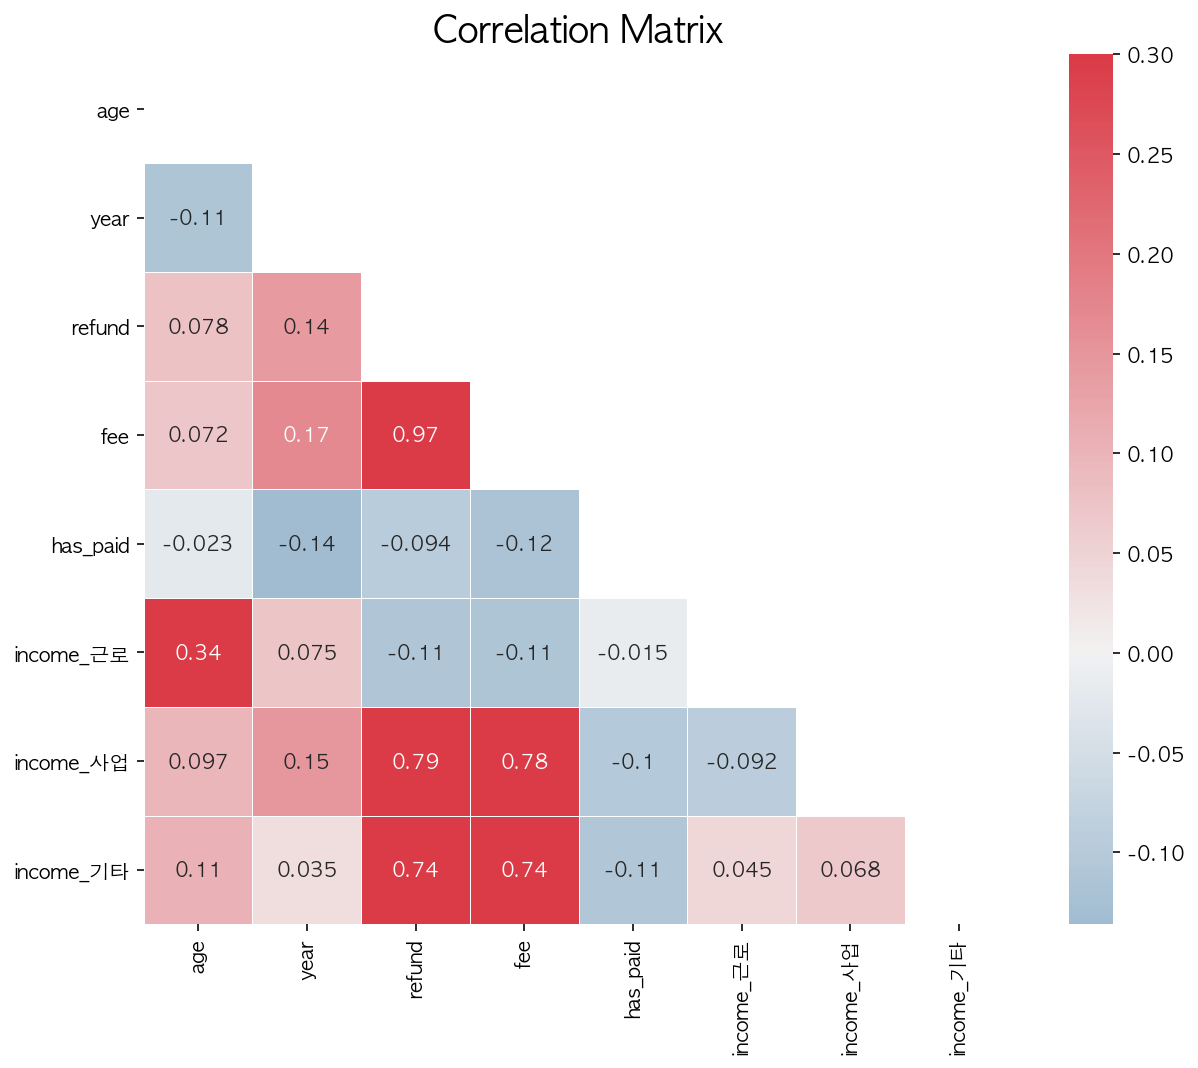

In [340]:
corr = df.corr()
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)

## 🌟 fee(수수료)는 refund와 income_사업, income_기타와 강한 양의 상관관계를 보인다
## 🌟 has_paid와 다른 요인간의 상관성이 없다..
### => has_paid가 boolean 타입이기 때문에 상관성이 없는 결과가 나오는 건아닐까?

In [341]:
# boolean to int
df["has_paid"] = df["has_paid"].astype("str")
df["has_paid"][0]

'False'

In [342]:
df["has_paid"][1]

'True'

In [343]:
df["has_paid"] = df["has_paid"].replace("True",1)
df["has_paid"] =  df["has_paid"].replace("False",0)
    

In [344]:
df["has_paid"][1]

1

## 다시 상관성 분석!!

/var/folders/44/crx333nn0lvgs_gnbz2k_qym0000gn/T/ipykernel_76044/1488717444.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Correlation Matrix'}>

<Figure size 720x720 with 0 Axes>

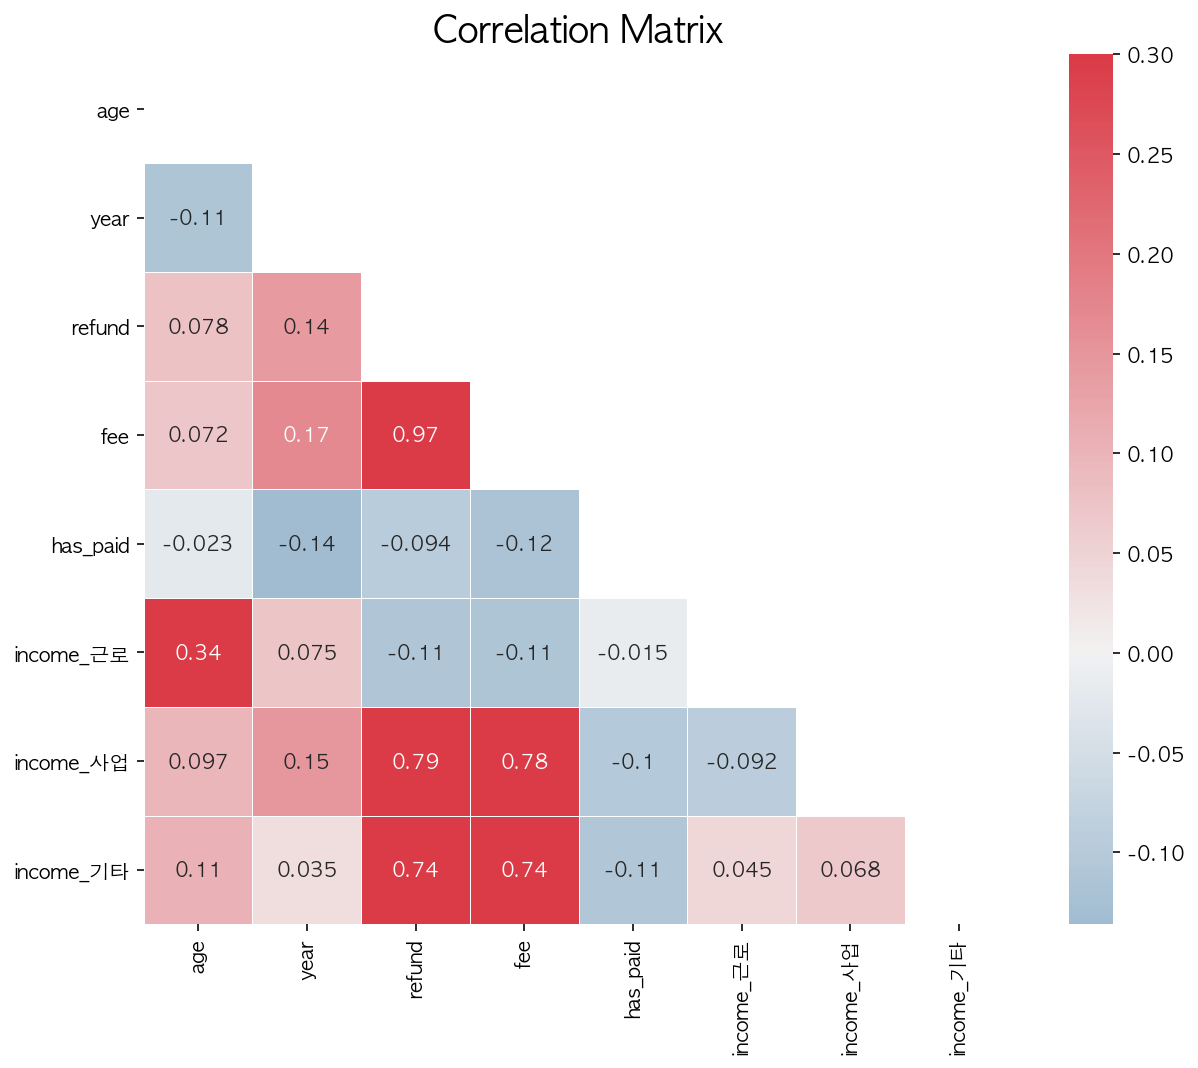

In [345]:
corr = df.corr()
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)

## => 근로 소득과 아주 약한 상관관계가 보이지만 뚜렷한 상관관계는 보이지 않는다!

## 🤔 가설
### 1. refund가 적을 경우 has_paid가 False일 것이다.
### 2. fee/refund(%)가 클 수록 has_paid가 True일 경우가 클 것이다.
### 3. 나이가 어릴 수록 has_paid가 False일 경우가 클 것이다.
### 4. 보통 근로소득을 받을 경우 연말 정산을 통해 환급을 받기 때문에 서비스 사용이 적을 것이다.
### 5. fee가 적을수록 has_paird가 Flase일 경우가 클 것이다.

In [346]:
# fee/refund(%) 컬럼 생성
df["fee/refund(%)"] = (df["fee"]/df["refund"])*100
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%)
0,27.0,F,2019,5000.0,400.0,0,10001000.0,61000.0,NaN,8.000000
1,34.0,M,2018,100000.0,1700.0,1,18092000.0,NaN,1815000.0,1.700000
2,28.0,F,2017,289000.0,11500.0,0,NaN,1461000.0,NaN,3.979239
3,27.0,M,2019,410000.0,16200.0,0,NaN,2471000.0,NaN,3.951220
4,26.0,F,2016,114000.0,4300.0,1,0.0,689000.0,NaN,3.771930


## 상관관계 분석

/var/folders/44/crx333nn0lvgs_gnbz2k_qym0000gn/T/ipykernel_76044/1488717444.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Correlation Matrix'}>

<Figure size 720x720 with 0 Axes>

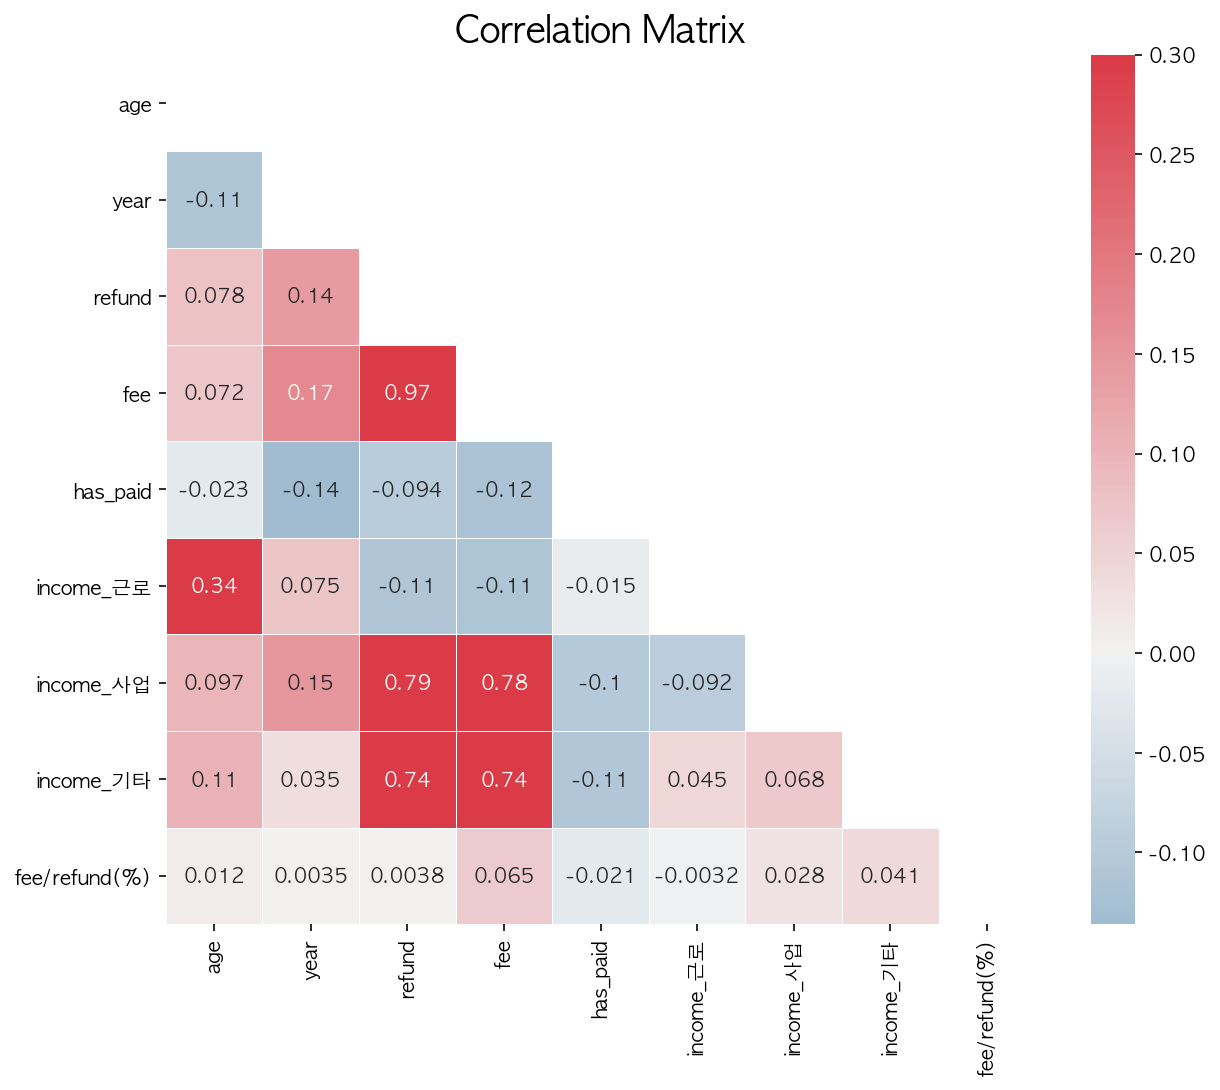

In [347]:
corr = df.corr()
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)

## 데이터 분석

In [348]:
# 통계 - fee/refund(%) inf로 나타남... fillna로 0으로 바꿔줘야겠다.
df.describe()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%)
count,100000.00000,100000.000000,1.000000e+05,100000.000000,100000.00000,4.079100e+04,7.822700e+04,2.526000e+04,1.000000e+05
mean,29.00096,2018.111300,2.081422e+05,7247.641000,0.64643,6.432597e+06,1.511712e+06,6.362834e+05,NaN
std,7.76819,1.495812,3.071744e+05,11926.896979,0.47808,6.583716e+06,2.449810e+06,1.484947e+06,NaN
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,-inf
25%,24.00000,2017.000000,3.300000e+04,400.000000,0.00000,1.616000e+06,1.770000e+05,8.200000e+04,1.830986e+00
50%,27.00000,2018.000000,9.900000e+04,4300.000000,1.00000,4.507000e+06,6.190000e+05,2.130000e+05,3.333333e+00
75%,31.00000,2019.000000,2.540000e+05,8500.000000,1.00000,9.301000e+06,1.601000e+06,5.820000e+05,3.942308e+00
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.00000,1.823350e+08,3.993400e+07,6.281000e+07,inf


In [349]:
# 0으로 바꿔주고 다시 raw 값 변경 필요
df = pd.read_csv("/Users/ijuyeong/onboarding_project/folk/team1_wanted_onboarding_2nd/Week2_이주영/Jobis_3o3.csv",encoding="utf-8")


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [351]:
df["age"] = df["age"].astype("int64")
df["refund"] = df["refund"].astype("int64")
df["fee"] = df["fee"].astype("int64")
df = df.fillna(0)
df["fee/refund(%)"] = round((df["fee"]/df["refund"])*100,2)
df["fee/refund(%)"]  = df["fee/refund(%)"] .replace([np.inf, -np.inf], 0)
df["income_근로"] = df["income_근로"].astype("int64")
df["income_사업"] = df["income_사업"].astype("int64")
df["income_기타"] = df["income_기타"].astype("int64")

In [352]:
df["has_paid"] = df["has_paid"].astype("str")
df["has_paid"] = df["has_paid"].replace("True",1)
df["has_paid"] = df["has_paid"].replace("False",0)


df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%)
0,27,F,2019,5000,400,0,10001000,61000,0,8.00
1,34,M,2018,100000,1700,1,18092000,0,1815000,1.70
2,28,F,2017,289000,11500,0,0,1461000,0,3.98
3,27,M,2019,410000,16200,0,0,2471000,0,3.95
4,26,F,2016,114000,4300,1,0,689000,0,3.77


In [353]:
# 성별에 - 는 뭘까?
for i in range(len(df.columns)):
    print(df.columns[i],":",df[df.columns[i]].unique())

age : [27 34 28 26 39 40 23 54 22 25 42 37 48 33 44 31 30 20 24 60 32 35 29 36
 47 58 43 21 41 38 61 49 55 50 62 56 52 19 18 45 51 46 59 53 57 17 76 64
 65 66 69 71 67 72 63 70 16 15 77 68 79 78 74 81 73]
gender : ['F' 'M' '-']
year : [2019 2018 2017 2016 2015 2020]
refund : [   5000  100000  289000 ... 2545000 2280000 1591000]
fee : [   400   1700  11500  16200   4300  12800  73100    900   6400  29800
   9800   8500   7200  15700  17900   5100  18700  27200   9400  10200
  34400   3000   4700   6000  20800   2600   1300  23800   7700  27600
  15300  24200  12300  21700  45900  17000  42500   3800  28100   2100
   3400  18300  14000   8100   5500  26400  37000  37400  19100   6800
  11900  40800  36100  25900  26800  11100  16600  61600  24700  32700
  30200  40400  23400  14500  35300  33200  31000  10600  38700  31900
  21300  14900  19600  22100  13200   8900  31500  34000  49300  54000
  30600  13600  80400  28500  20400  43800  74800  37800  17400  36600
  45500  41200  32300 109

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   age            100000 non-null  int64  
 1   gender         100000 non-null  object 
 2   year           100000 non-null  int64  
 3   refund         100000 non-null  int64  
 4   fee            100000 non-null  int64  
 5   has_paid       100000 non-null  int64  
 6   income_근로      100000 non-null  int64  
 7   income_사업      100000 non-null  int64  
 8   income_기타      100000 non-null  int64  
 9   fee/refund(%)  100000 non-null  float64
dtypes: float64(1), int64(8), object(1)
memory usage: 7.6+ MB


In [355]:
df.describe()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%)
count,100000.00000,100000.000000,1.000000e+05,100000.000000,100000.00000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,29.00096,2018.111300,2.081422e+05,7247.641000,0.64643,2.623921e+06,1.182567e+06,1.607252e+05,3.431284
std,7.76819,1.495812,3.071744e+05,11926.896979,0.47808,5.260655e+06,2.254789e+06,7.958761e+05,8.502851
min,15.00000,2015.000000,-8.265000e+06,400.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,-8.000000
25%,24.00000,2017.000000,3.300000e+04,400.000000,0.00000,0.000000e+00,3.100000e+04,0.000000e+00,1.830000
50%,27.00000,2018.000000,9.900000e+04,4300.000000,1.00000,0.000000e+00,3.280000e+05,0.000000e+00,3.330000
75%,31.00000,2019.000000,2.540000e+05,8500.000000,1.00000,2.994000e+06,1.235000e+06,2.000000e+03,3.940000
max,81.00000,2020.000000,7.725000e+06,307000.000000,1.00000,1.823350e+08,3.993400e+07,6.281000e+07,1595.000000


## 가설 1. refund가 적을 경우 has_paid가 False일 것이다.
## 가설 2. fee/refund(%)가 클 수록 has_paid가 False일 경우가 클 것이다.
## 가설 5. fee가 적을수록 has_paird가 True인 경우가 클 것이다.
<br/>

## ✅ 연도별로 예상환급액이 오른 만큼 수수료도 함께 올랐다.
## ✅ 예상환급액에 비해 수수료 상승률이 약 5% 더 올랐고, 그래프를 봤을 때, has_paid는 수수료 변동과 비슷한 추세를 보였다.
## A. refund가 적을 경우, 대체적으로 fee도 적다. fee가 적을 수록 수수료를 결제할 확률이 높아진다. 예상환급액 대비 수수료가 낮아야 has_paid True가 높다.
## 🌟 Result (가설 1,2,5) : refund가 적을수록 fee가 적을 수록 수수료 결제 확률 높으며, 예상환급액 대비 수수료가 낮을 수록 수수료 결제 확률이 높아진다.

In [356]:
print("수수료 상승률 : " , round((df[df["year"]==2020].fee.sum() - df[df["year"]==2015].fee.sum()) / df[df["year"]==2015].fee.sum(),2))
print("예상환급액 상승률 : " ,round((df[df["year"]==2020].refund.sum() - df[df["year"]==2015].refund.sum()) / df[df["year"]==2015].refund.sum(),2))

수수료 상승률 :  15.32
예상환급액 상승률 :  10.54


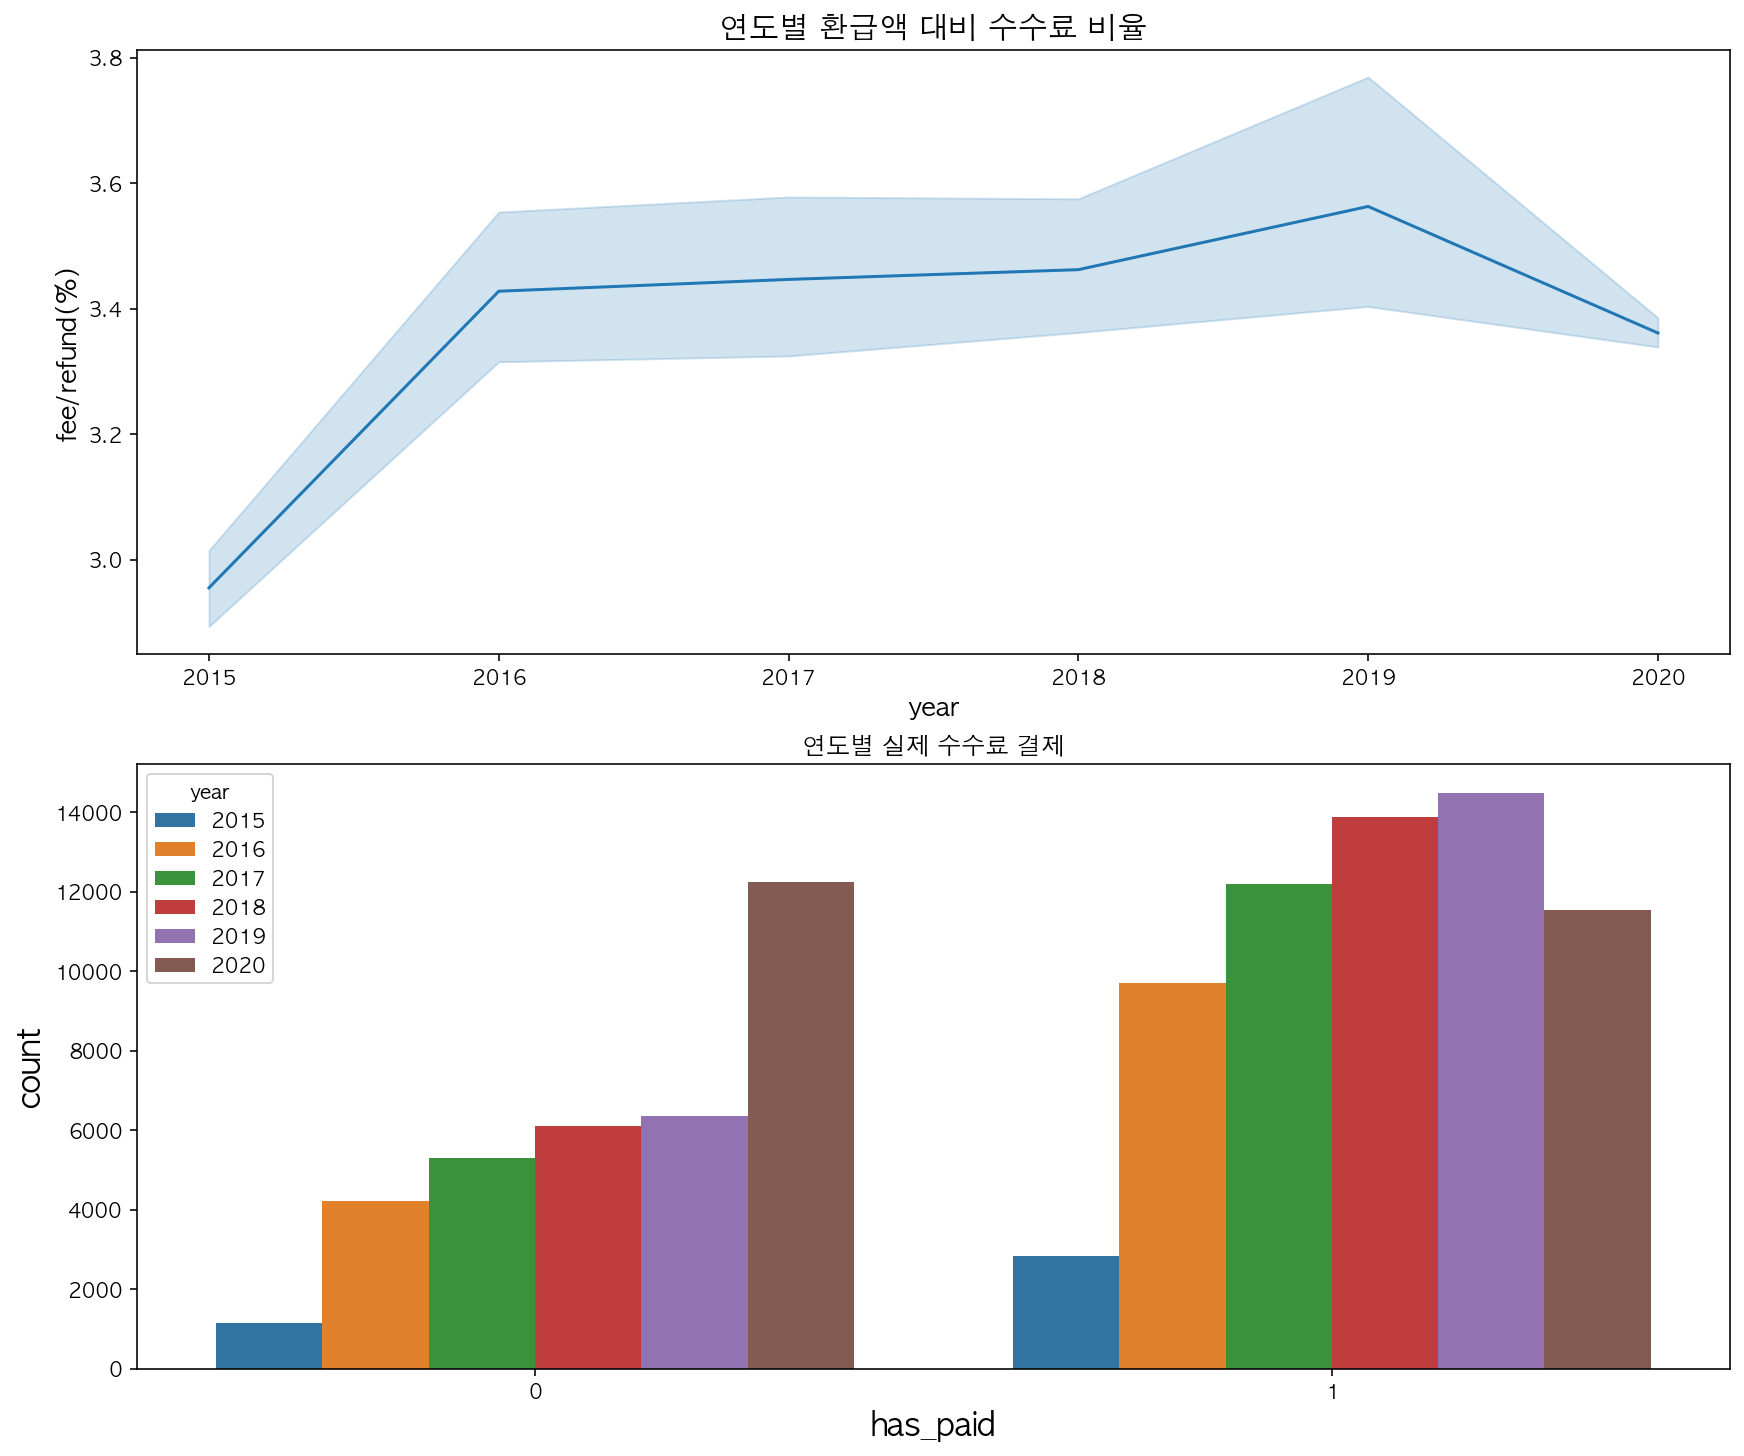

In [357]:
fig = plt.figure(figsize=(12, 10),constrained_layout=True)
gs = GridSpec(2, 1, figure=fig)
ax1 = fig.add_subplot(gs[0 :-1])
ax2 = fig.add_subplot(gs[1 :,-1])

# 연도별 예상환급액
sns.lineplot(data=df.set_index("year")["fee/refund(%)"],ax=ax1)
ax1.set_title("연도별 환급액 대비 수수료 비율", fontsize=15)
ax1.set_xlabel("year",fontsize=13)
ax1.set_ylabel("fee/refund(%)",fontsize=13)

# 연도별 실제 수수료 결제
sns.countplot(x="has_paid",data=df,hue="year",ax=ax2)
ax2.set_ylabel("count", fontsize=16)
ax2.set_xlabel("has_paid", fontsize=16)
ax2.set_title("연도별 실제 수수료 결제")


plt.show()

## column에 따른 수수료 결제율 비교

Text(0.5, 1.0, '연도별 수수료')

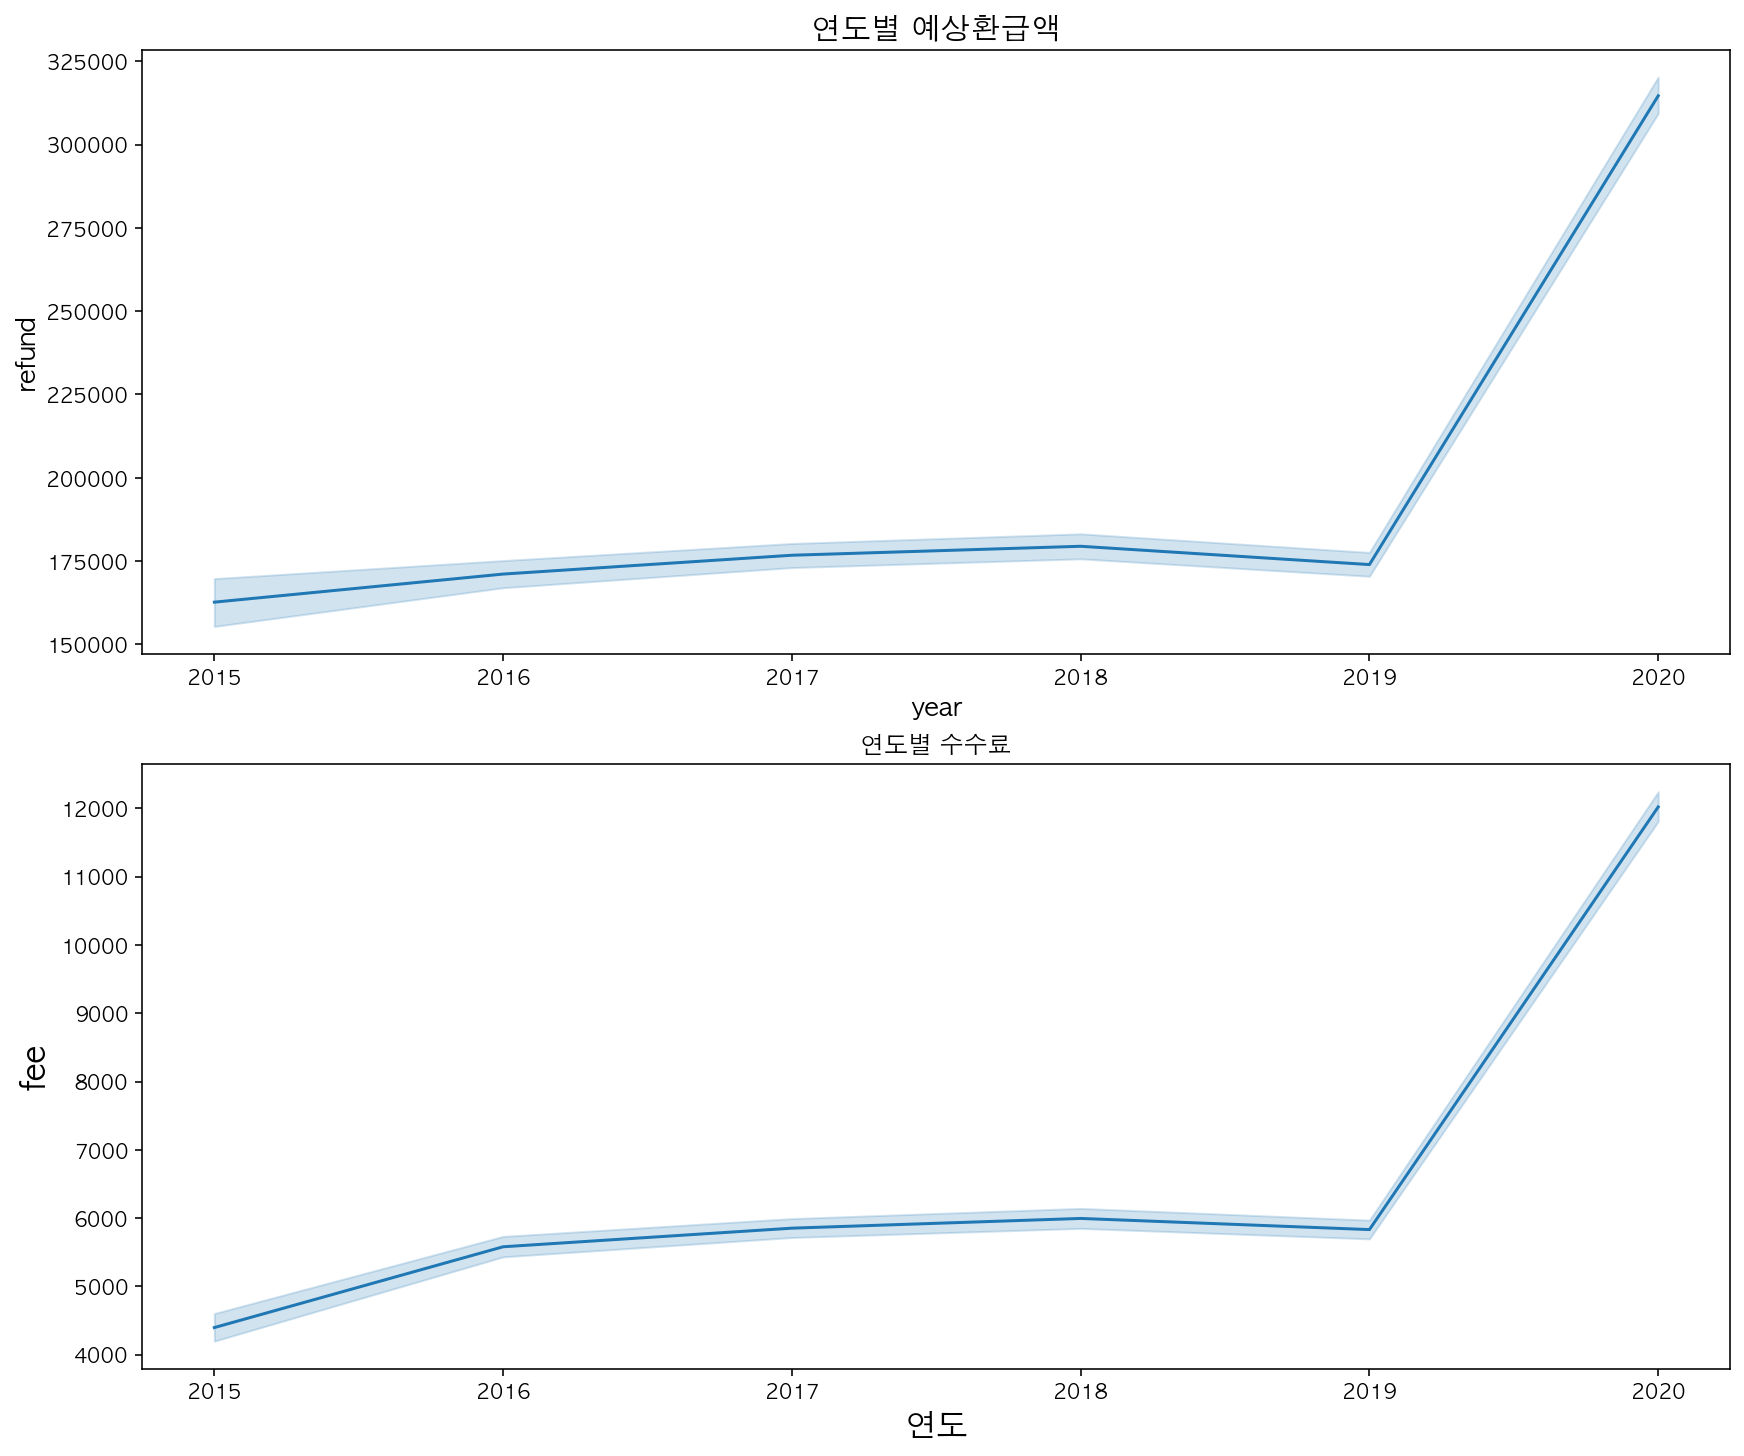

In [358]:
fig = plt.figure(figsize=(12, 10),constrained_layout=True)
gs = GridSpec(2, 1, figure=fig)
ax1 = fig.add_subplot(gs[0 :-1])
ax2 = fig.add_subplot(gs[1 :,-1])

# 연도별 예상환급액
sns.lineplot(data=df.set_index("year")["refund"],ax=ax1)
ax1.set_title("연도별 예상환급액", fontsize=15)
ax1.set_xlabel("year",fontsize=13)
ax1.set_ylabel("refund",fontsize=13)

# 연도별 실제 수수료 결제
sns.lineplot(data=df.set_index("year")["fee"],ax=ax2)
ax2.set_ylabel("fee", fontsize=16)
ax2.set_xlabel("연도", fontsize=16)
ax2.set_title("연도별 수수료")


Text(0.5, 1.0, '예상환급액과 수수료')

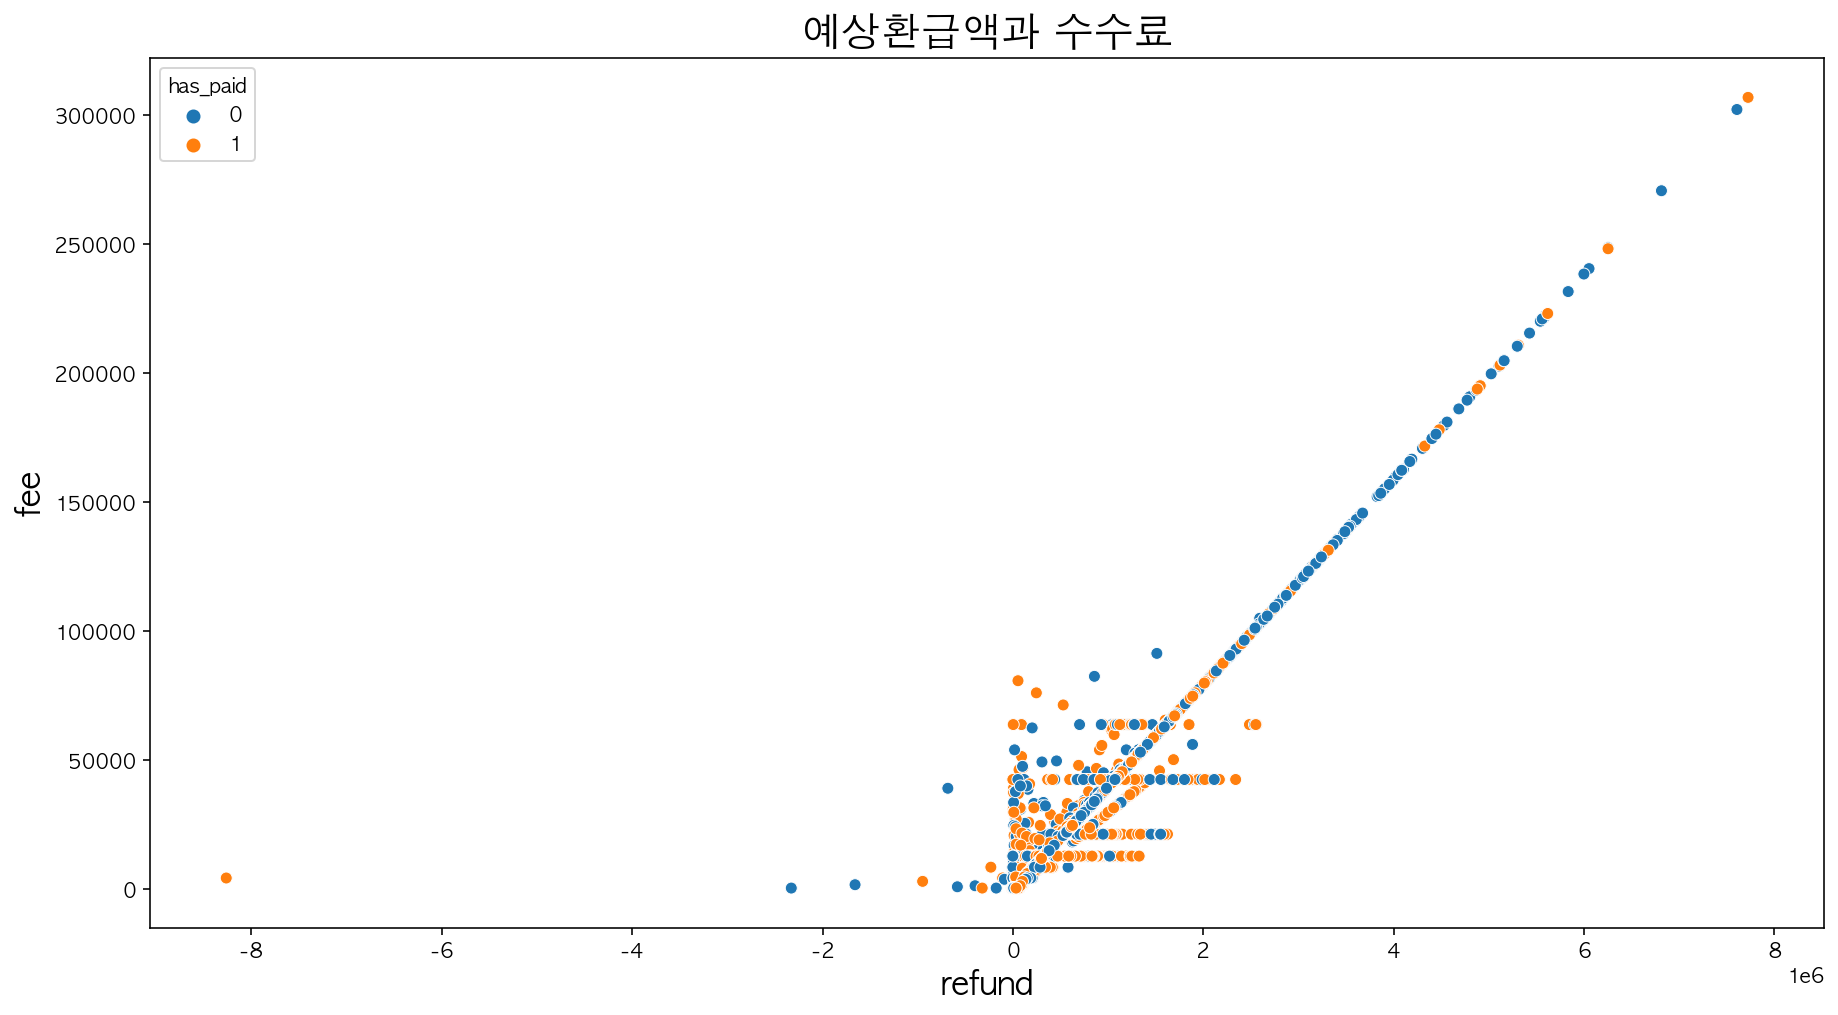

In [359]:
# 연도별 실제 수수료 결제
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x="refund",y="fee",hue="has_paid",data=df)
plt.ylabel("fee", fontsize=16)
plt.xlabel("refund", fontsize=16)
plt.title("예상환급액과 수수료",fontsize=20)

## 가설 3. 나이가 어릴 수록 has_paid가 False일 경우가 클 것이다.
## A . 소비자 비중은 보통 20-30대에였으며, 적은 비율이였던 10,70,80대가 높은 비율로 수수료를 결제함

### 나이대 만들기

In [360]:
df["나이대"] = df["age"]

In [361]:
def age_range(x):
    if x <20 : 
        return 10
    elif x>=20 and x<30:
        return 20
    elif x>=30 and x<40:
        return 30
    elif x>=40 and x<50:
        return 40
    elif x>=50 and x<60:
        return 50
    elif x>=60 and x<70:
        return 60
    elif x>=70 and x<80:
        return 70
    else:
        return 80

In [362]:
df["나이대"] = df.apply(lambda x: age_range(x.나이대),axis=1)

In [363]:
df["나이대"].unique()

array([20, 30, 40, 50, 60, 10, 70, 80])

In [364]:
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%),나이대
0,27,F,2019,5000,400,0,10001000,61000,0,8.00,20
1,34,M,2018,100000,1700,1,18092000,0,1815000,1.70,30
2,28,F,2017,289000,11500,0,0,1461000,0,3.98,20
3,27,M,2019,410000,16200,0,0,2471000,0,3.95,20
4,26,F,2016,114000,4300,1,0,689000,0,3.77,20


In [365]:
df.columns

Index(['age', 'gender', 'year', 'refund', 'fee', 'has_paid', 'income_근로',
       'income_사업', 'income_기타', 'fee/refund(%)', '나이대'],
      dtype='object')

In [366]:
def paid(feature):
    if feature!="has_paid":
        print(f"[{feature}에 따른 수수료 결제율]")
        df_feature = df[[feature,"has_paid"]].groupby([feature], as_index=False).mean().sort_values(by='has_paid', ascending=False)
        print(df_feature)
        print("\n\n")
        

In [367]:
# 나이대에 따른 수수료 결제율
paid(df.columns[10])

[나이대에 따른 수수료 결제율]
   나이대  has_paid
7   80  1.000000
6   70  0.785714
0   10  0.692729
5   60  0.675565
1   20  0.653388
2   30  0.635605
4   50  0.617035
3   40  0.610124





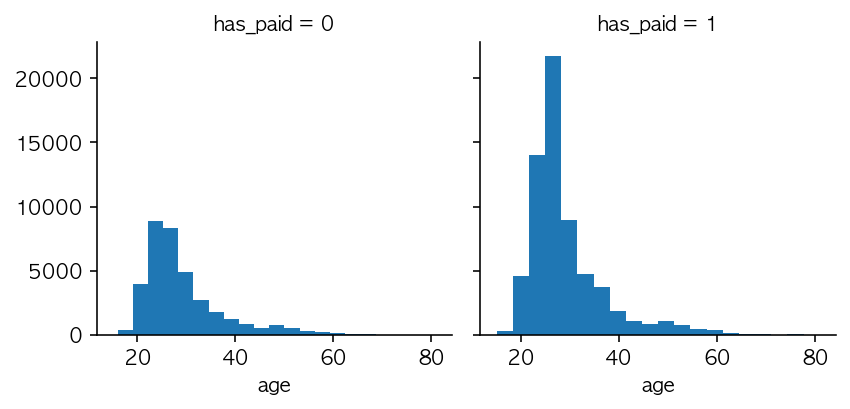

In [368]:
# 열(col)을 수수료 결제 여부로 나눔
g = sns.FacetGrid(df, col='has_paid')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist, 'age', bins=20)

## 가설 4. 보통 근로소득을 받을 경우 연말 정산을 통해 환급을 받기 때문에 서비스 사용이 적을 것이다.
## A . 

### 간단하게 근로, 사업 , 기타로 구분지어서 보자

In [369]:
 def TF(x):
    if x==0:
        return 0
    else:
        return 1

In [370]:
df["income_근로_tf"] =  df.apply(lambda x: TF(x.income_근로),axis=1)
df["income_사업_tf"] =  df.apply(lambda x: TF(x.income_사업),axis=1)
df["income_기타_tf"] =  df.apply(lambda x: TF(x.income_기타),axis=1)

In [371]:
# income_수입에 따른 수수료 결제율(0: 수입 없음, 1: 수입 있음)
paid(df.columns[11])
paid(df.columns[12])
paid(df.columns[13])

[income_근로_tf에 따른 수수료 결제율]
   income_근로_tf  has_paid
1             1  0.699514
0             0  0.611200



[income_사업_tf에 따른 수수료 결제율]
   income_사업_tf  has_paid
1             1  0.709339
0             0  0.421164



[income_기타_tf에 따른 수수료 결제율]
   income_기타_tf  has_paid
1             1  0.660362
0             0  0.641758





In [372]:
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%),나이대,income_근로_tf,income_사업_tf,income_기타_tf
0,27,F,2019,5000,400,0,10001000,61000,0,8.00,20,1,1,0
1,34,M,2018,100000,1700,1,18092000,0,1815000,1.70,30,1,0,1
2,28,F,2017,289000,11500,0,0,1461000,0,3.98,20,0,1,0
3,27,M,2019,410000,16200,0,0,2471000,0,3.95,20,0,1,0
4,26,F,2016,114000,4300,1,0,689000,0,3.77,20,0,1,0


In [373]:
df1 = df.copy()
df1["income_근로_tf"]= df1["income_근로_tf"].astype(str)
df1["income_사업_tf"]= df1["income_사업_tf"].astype(str)
df1["income_기타_tf"] = df1["income_기타_tf"].astype(str)
df1["income"] = df1["income_근로_tf"] + df1["income_사업_tf"]+ df1["income_기타_tf"]
df1

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%),나이대,income_근로_tf,income_사업_tf,income_기타_tf,income
0,27,F,2019,5000,400,0,10001000,61000,0,8.00,20,1,1,0,110
1,34,M,2018,100000,1700,1,18092000,0,1815000,1.70,30,1,0,1,101
2,28,F,2017,289000,11500,0,0,1461000,0,3.98,20,0,1,0,010
3,27,M,2019,410000,16200,0,0,2471000,0,3.95,20,0,1,0,010
4,26,F,2016,114000,4300,1,0,689000,0,3.77,20,0,1,0,010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27,F,2019,301000,11900,1,0,0,680000,3.95,20,0,0,1,001
99996,62,F,2019,77000,1300,1,0,463000,0,1.69,60,0,1,0,010
99997,24,M,2020,9000,400,0,7923000,54000,0,4.44,20,1,1,0,110
99998,24,M,2019,34000,400,1,0,204000,0,1.18,20,0,1,0,010


Text(0.5, 0, 'has_paid')

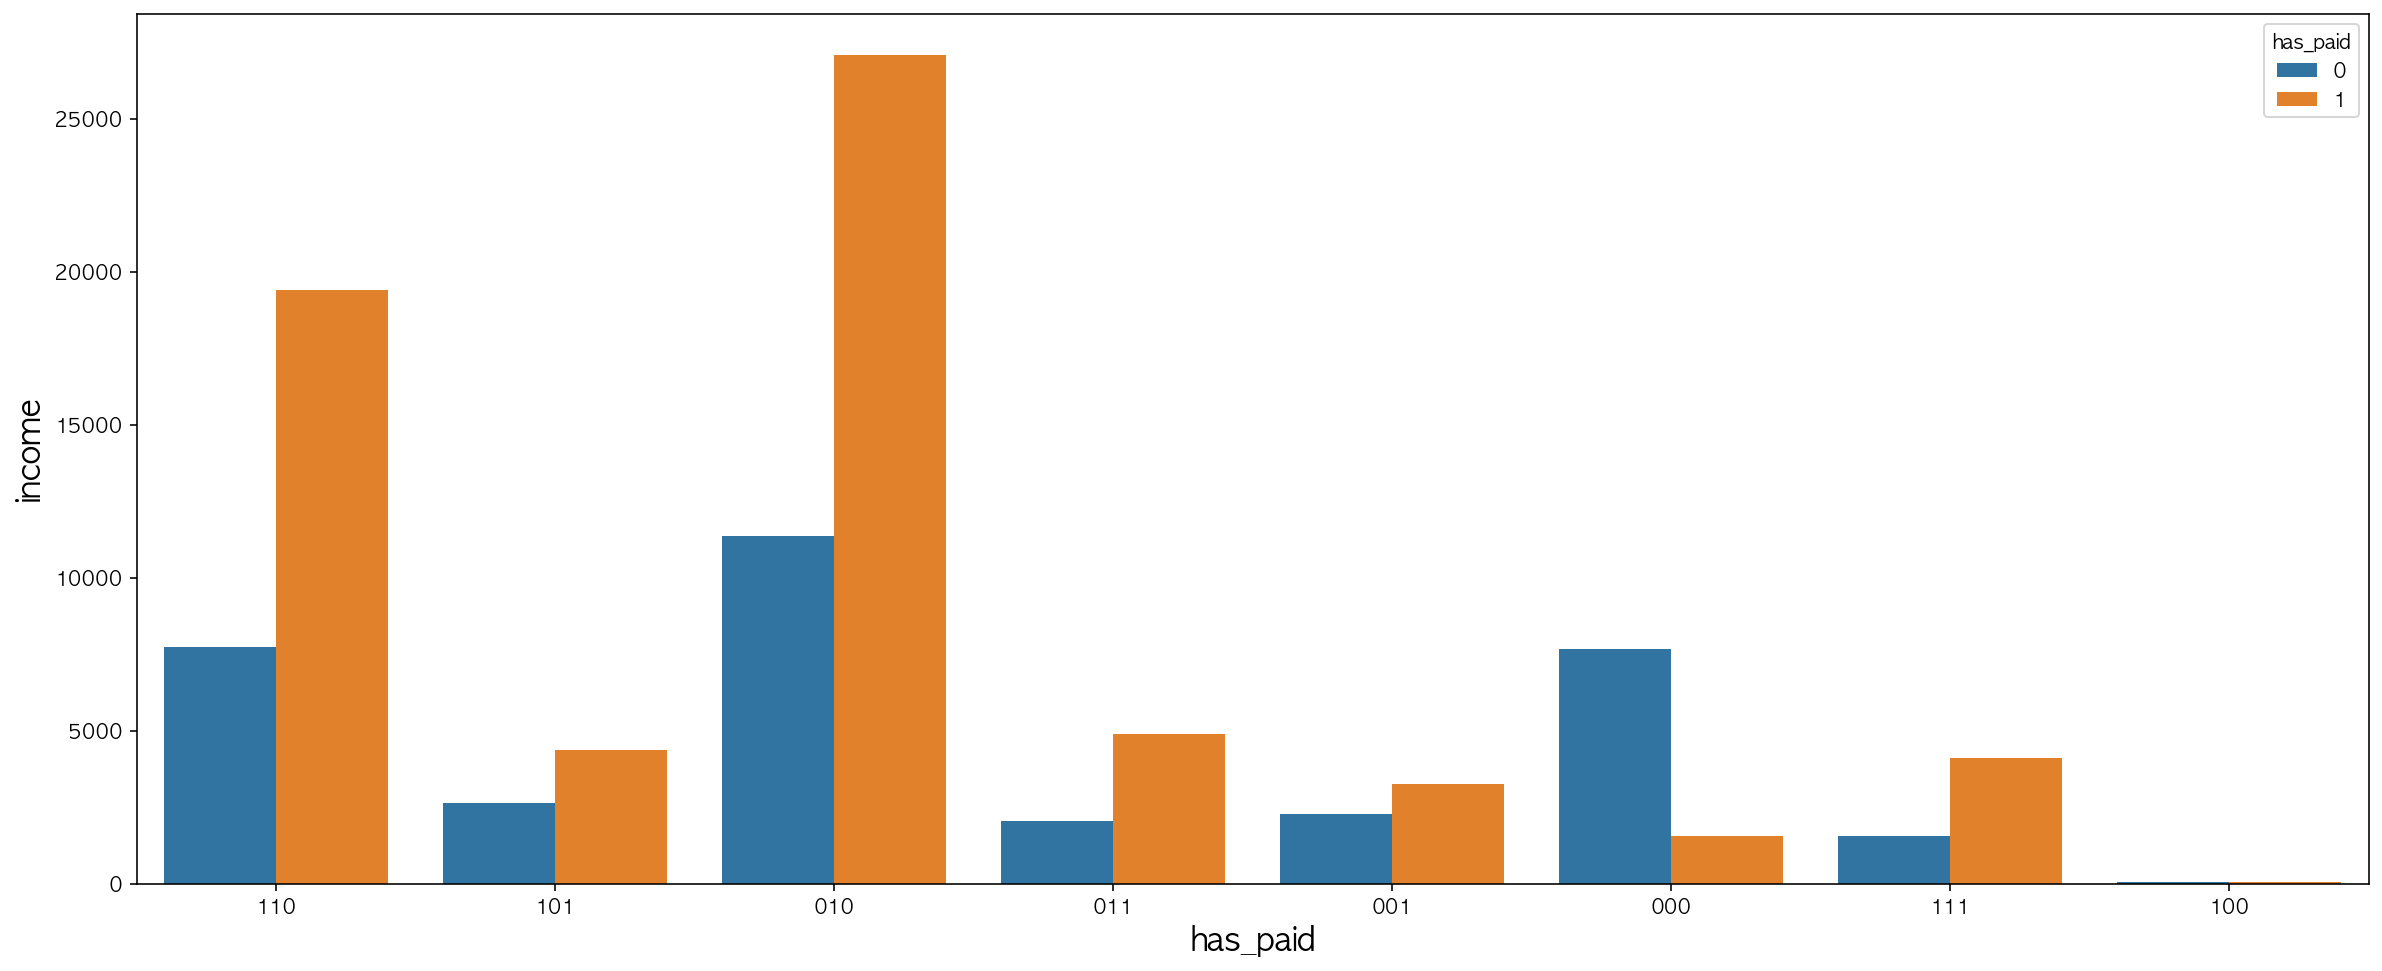

In [383]:
# 000 : 없음 , 001 : 기타 , 010:사업, 011:사업 & 기타 , 100 : 근로, 101 : 근로 & 기타, 110 : 근로 & 사업, 111 : 근로 & 사업 & 기타(8)
# 소득이 없는데 왜 수수료를 결제 했지???(000)
# 근로 소득만 있는 소비자는 거의 없다(101)
# 보통 사업소득이 있는 소비자의 결제율이 높다.
fig = plt.figure(figsize=(20,8))
sns.countplot(x="income",data=df1,hue="has_paid")
plt.ylabel("income", fontsize=16)
plt.xlabel("has_paid", fontsize=16)

## 추가 : 성별 컬럼도 한번 보자
## 유의미한 차이는 없다

In [374]:
paid(df.columns[1])

[gender에 따른 수수료 결제율]
  gender  has_paid
2      M  0.658755
1      F  0.634068
0      -  0.181818





Text(0.5, 0, '수수료')

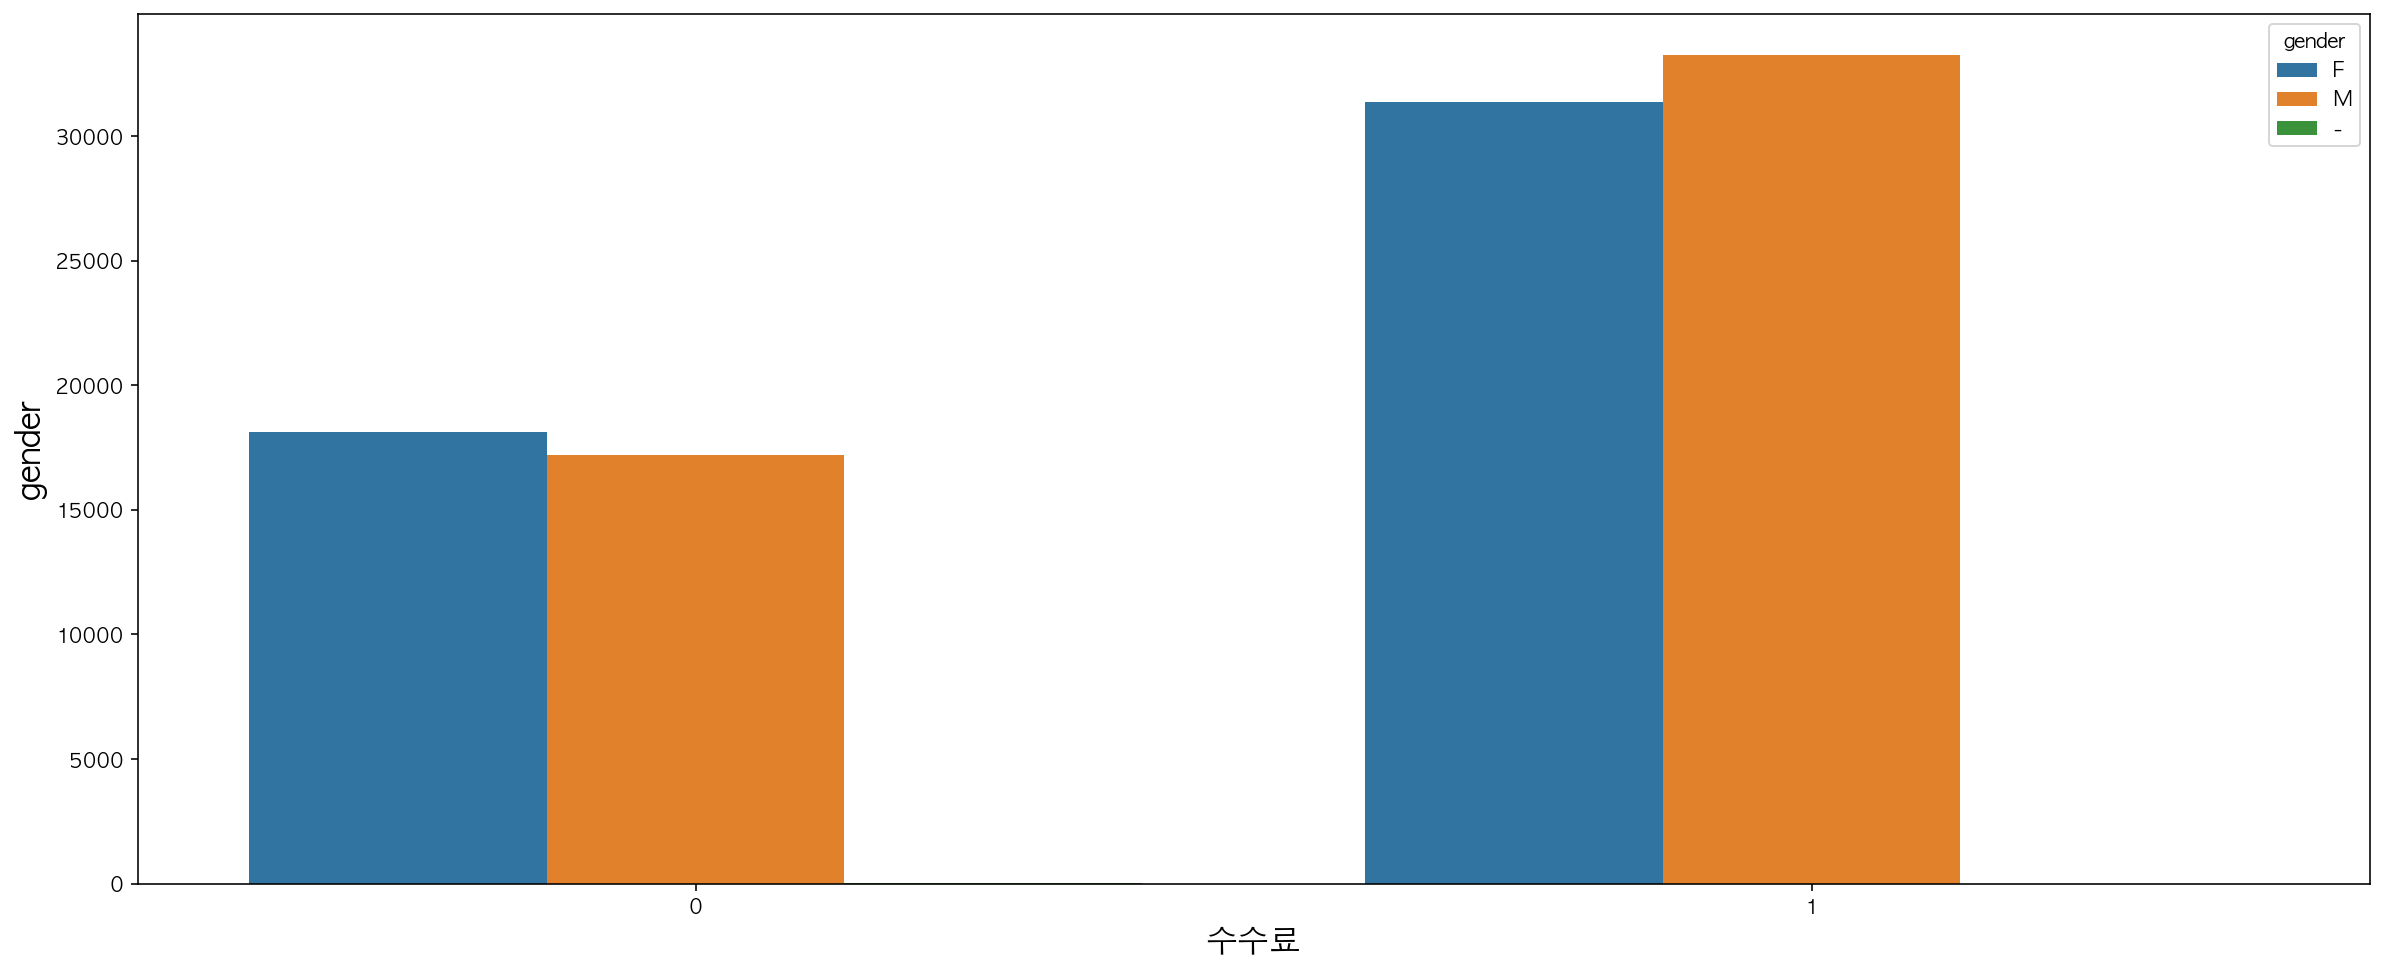

In [375]:
# 여성 비율이 서비스를 이용하지 않은 경우가 남성 비율에 비해 많다.,
fig = plt.figure(figsize=(20,8))
sns.countplot(x="has_paid",data=df,hue="gender")
plt.ylabel("gender", fontsize=16)
plt.xlabel("수수료", fontsize=16)

In [376]:
data_gender_count = df.groupby(['gender']).sum()
data_gender_count

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,fee/refund(%),나이대,income_근로_tf,income_사업_tf,income_기타_tf
gender,,,,,,,,,,,,,
-,661,44378,5364000,163500,4,0,0,0,65.09,560,0,0,0
F,1447503,99897734,9726221000,336189600,31387,116554376000,53596946000,6616006000,167548.91,1226140,19798,39035,11805
M,1451932,101869018,11082639000,388411000,33252,145837687000,64659761000,9456513000,175514.38,1215920,20094,39135,13307
